In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PynPoint.util import CWT
from copy import deepcopy
%matplotlib inline 

## Create Gaussian fake signal

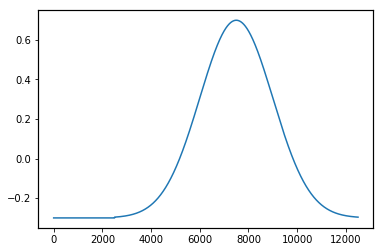

In [102]:
g_signal = scipy.signal.gaussian(10000, 1500)
g_signal = np.append(np.zeros(2500), g_signal[:14000])
noise_signal = deepcopy(g_signal)
noise_signal += np.random.normal(0, 3.0, len(g_signal))
noise_signal -= np.ones(len(g_signal)) * np.mean(g_signal)
g_signal-= np.ones(len(g_signal)) * np.mean(g_signal)
plt.plot(g_signal)
plt.show()

In [103]:
cwt_rep = CWT.WaveletAnalysisCapsule(noise_signal,
                                     wavelet_in="dog",
                                     order=2,
                                     padding="zero", 
                                     frequency_resolution=0.1)
cwt_rep.compute_cwt()

In [104]:
cwt_rep_no_noise = CWT.WaveletAnalysisCapsule(g_signal,
                                              wavelet_in="dog",
                                              order=2,
                                              padding="zero", 
                                              frequency_resolution=0.1)
cwt_rep_no_noise.compute_cwt()

## New Plot

In [105]:
from PynPoint.util import continous as wave
import copy
import matplotlib.colors as colors
plt.rcParams['hatch.linewidth'] = 0.5

In [127]:
def plot_wavelet_space(ax, 
                       cwt_rep,
                       minimum,
                       maximum,
                       cmap):
    tmp_y = wave.fourier_from_scales(cwt_rep._m_scales,
                                 cwt_rep._m_wavelet,
                                 cwt_rep._m_order)

    #tmp_y = cwt_rep._m_scales
    tmp_x = np.arange(0, cwt_rep._m_data_size + 1, 1)

    scaled_spec = copy.deepcopy(cwt_rep._m_spectrum.real)

    for i in range(len(scaled_spec)):
        scaled_spec[i] /= (np.sqrt(cwt_rep._m_scales[i])*0.05)
    
    border = len(tmp_x)/6
    # COI
    inner_frequency = np.sqrt(2 + 0.5)/(2*np.pi)
    s0 = np.sqrt(2) / np.pi
    def scales_func_inv(i):
        return np.log2(i*np.sqrt(2))/0.1

    coi = np.append(np.ones(len(tmp_x)/4)*0.2,
                    tmp_x[0:len(tmp_x) / 4])
    coi = np.append(coi,
                    tmp_x[0:len(tmp_x) / 4][::-1])
    coi = np.append(coi,
                    np.ones(len(tmp_x)/ 4)*0.2 )

    coi = coi[border:]
    coi = coi[:-border]

    ax.plot(np.arange(0, len(coi), 1.0),
            scales_func_inv(coi),
            linewidth=0.5,
            color="black")

    ax.fill_between(np.arange(0, len(coi) , 1.0),
                    scales_func_inv(coi),
                    np.ones(len(coi)) * tmp_y[-1],
                    facecolor="none",
                    edgecolor='black',
                    alpha=0.2,
                    hatch="x")
    # -----

    scaled_spec = scaled_spec[:, border:]
    scaled_spec = scaled_spec[:, :-border]

    img = ax.imshow(np.abs(scaled_spec),
              aspect='auto',
              #norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
              vmin=max(minimum, 0.001),
              vmax=maximum,
              cmap=cmap,
              origin='lower')

    ax.set_yticks(range(len(tmp_y)))
    ax.set_yticklabels(tmp_y.astype(int).astype('|S10'), rotation='horizontal', fontsize=12)

    plt.setp(ax.get_yticklabels()[:], visible=False)
    plt.setp(ax.get_yticklabels()[::15], visible=True)
    plt.setp(ax.get_yticklines()[:], visible=False)
    plt.setp(ax.get_yticklines()[::15], visible=True)
    return img

In [128]:
from scipy.signal import medfilt
def plot_signal(ax, cwt_rep, linew, lim, med=False, alp=False):
    signal = cwt_rep.update_signal()
    signal = cwt_rep.get_signal()
    border = len(cwt_rep._m_data)/12
    
    signal -= np.ones(len(signal))* np.mean(signal[0:10])
    signal = np.append(np.zeros(border),
                       signal)
    signal = np.append(signal,
                       np.zeros(border))
    
    #signal = cwt_rep._m_data[border:] 
    #signal = signal[:-border]
    if med:
        signal = medfilt(signal)
    if alp:
        alpha = 0.2
    else:
        alpha = 1.0
    
    ax.plot(signal, c="black", lw=linew, alpha=alpha)
    #ax.set_ylabel("Value of the function")
    ax.set_xlim([0, len(signal)])
    ax.set_ylim([-lim,lim])
    ax.set_xlabel("Time in [frames]",
                 fontsize=12)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
        tick.label.set_rotation(45)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10) 

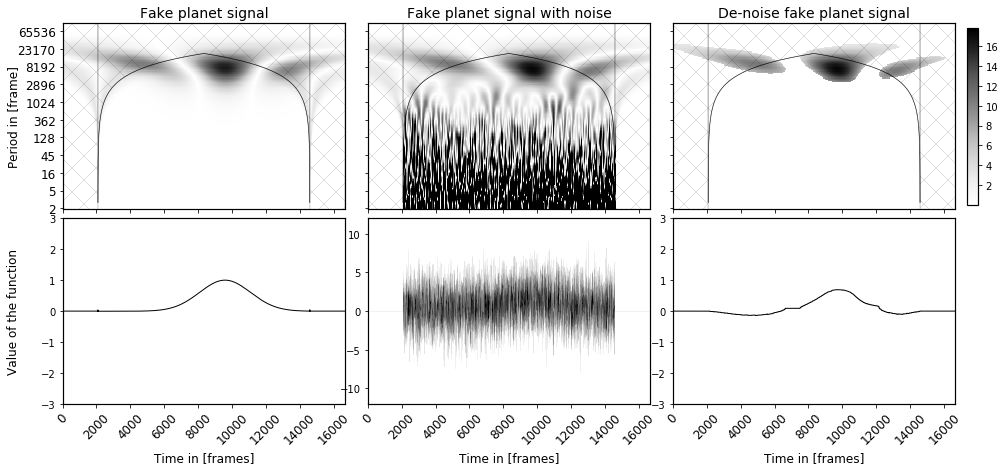

In [129]:
cwt_rep_tmp = deepcopy(cwt_rep)
plt.rc('axes', linewidth=1.2)
f, axarr = plt.subplots(2,3, 
                        sharex='col',
                        
                        figsize=(16, 7)) # 

ax1 = axarr[0, 0]
ax2 = axarr[1, 0]

ax3 = axarr[0, 1]
ax4 = axarr[1, 1]

ax5 = axarr[0, 2]
ax6 = axarr[1, 2]

# Calc min max 
scaled_spec = copy.deepcopy(cwt_rep_tmp._m_spectrum.real)

for i in range(len(scaled_spec)):
    scaled_spec[i] /= (np.sqrt(cwt_rep._m_scales[i])*0.05)

minimum = np.min(abs(scaled_spec))
maximum = np.max(abs(scaled_spec))/15
cmap = "Greys"

plot_wavelet_space(ax1,
                   cwt_rep_no_noise,
                   minimum,
                   maximum,
                   cmap)
plot_signal(ax2,cwt_rep_no_noise, 1.0, 3)

ax1.set_title("Fake planet signal",
              fontsize=14)

ax1.set_ylabel("Period in [frame]",
               fontsize=12)
ax2.set_ylabel("Value of the function",
               fontsize=12)
ax1.get_yaxis().set_label_coords(-0.15,0.5)
ax2.get_yaxis().set_label_coords(-0.15,0.5)

plot_wavelet_space(ax3,
                   cwt_rep_tmp,
                   minimum,
                   maximum,
                   cmap)
ax3.set_title("Fake planet signal with noise",
              fontsize=14)
plt.setp(ax3.get_yticklabels()[:], visible=False)

plot_signal(ax4,cwt_rep_tmp, 0.05, 12)

cwt_rep_tmp.denoise_spectrum_universal_threshold(threshold=1.3,
                                                 soft=False)
cwt_rep_tmp.update_signal()

img = plot_wavelet_space(ax5,
                         cwt_rep_tmp,
                         minimum,
                         maximum,
                         cmap)
ax5.set_title("De-noise fake planet signal",
              fontsize=14)
plt.setp(ax5.get_yticklabels()[:], visible=False)

plot_signal(ax6,cwt_rep_tmp, 1.0, 3)

f.subplots_adjust(hspace=0.05)
f.subplots_adjust(wspace=0.08)

cbar_ax = f.add_axes([0.91, 0.52, 0.01, 0.35])
f.colorbar(img, cax=cbar_ax)

In [130]:
f.savefig("Plots/wavelet_space.pdf")